In [83]:
import torch
import torchvision

In [84]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = True
torch.manual_seed(random_seed)

In [85]:
import torchvision.transforms as transforms

dataset = torchvision.datasets.CIFAR10(root='data/', download=True, transform=transforms.ToTensor())
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [86]:
classes = dataset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [87]:
img, label = dataset[0]
img_shape = img.shape
img_shape

torch.Size([3, 32, 32])

Label (numeric): 1
Label (textual): automobile


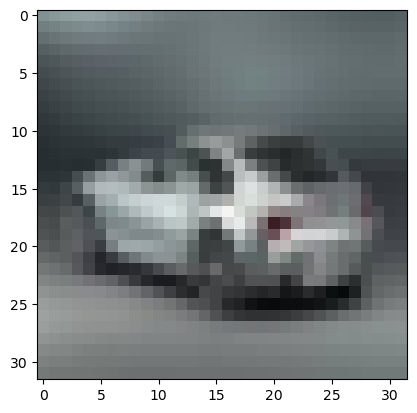

In [88]:
import matplotlib.pyplot as plt
img, label = dataset[250]
plt.imshow(img.permute((1, 2, 0)))
print('Label (numeric):', label)
print('Label (textual):', classes[label])

In [89]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = x.view(-1,32*32*3)
        x = F.relu(self.fc1(x))
        return x

model = Net()
print(model)

Net(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [90]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)
 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [91]:
num_epochs = 20
train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []

for epoch in range(num_epochs):
    train_loss = 0.0
    train_acc = 0.0
    val_loss = 0.0
    val_acc = 0.0

    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_acc += (outputs.argmax(1) == labels).sum().item()

    train_loss /= len(train_loader)
    train_loss_history.append(train_loss)
    train_acc /= len(train_loader.dataset)
    train_acc_history.append(train_acc)

    model.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_acc += (outputs.argmax(1) == labels).sum().item()

    val_loss /= len(test_loader)
    val_loss_history.append(val_loss)
    val_acc /= len(test_loader.dataset)
    val_acc_history.append(val_acc)

    print(f'Epoch {epoch+1}/{num_epochs}, train loss: {train_loss:.4f}, train acc: {train_acc:.4f}, val loss: {val_loss:.4f}, val acc: {val_acc:.4f}')

Epoch 1/20, train loss: 4.1446, train acc: 0.2592, val loss: 4.1325, val acc: 0.2630
Epoch 2/20, train loss: 4.0681, train acc: 0.2838, val loss: 4.1464, val acc: 0.2515
Epoch 3/20, train loss: 4.0470, train acc: 0.2903, val loss: 4.0361, val acc: 0.2925
Epoch 4/20, train loss: 4.0248, train acc: 0.2966, val loss: 4.0205, val acc: 0.2939
Epoch 5/20, train loss: 4.0188, train acc: 0.2970, val loss: 4.0414, val acc: 0.3009
Epoch 6/20, train loss: 4.0118, train acc: 0.2991, val loss: 4.0172, val acc: 0.2979
Epoch 7/20, train loss: 3.9955, train acc: 0.3034, val loss: 4.0820, val acc: 0.2721
Epoch 8/20, train loss: 3.9983, train acc: 0.3017, val loss: 4.0334, val acc: 0.2789
Epoch 9/20, train loss: 3.9869, train acc: 0.3031, val loss: 4.0001, val acc: 0.3004
Epoch 10/20, train loss: 3.9755, train acc: 0.3077, val loss: 4.0400, val acc: 0.2898
Epoch 11/20, train loss: 3.9791, train acc: 0.3026, val loss: 4.0358, val acc: 0.2907
Epoch 12/20, train loss: 3.9689, train acc: 0.3062, val loss: 3

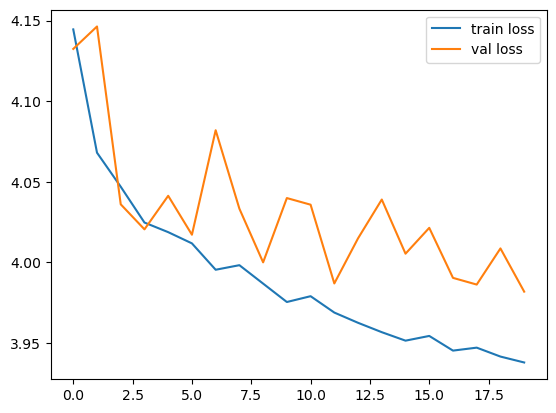

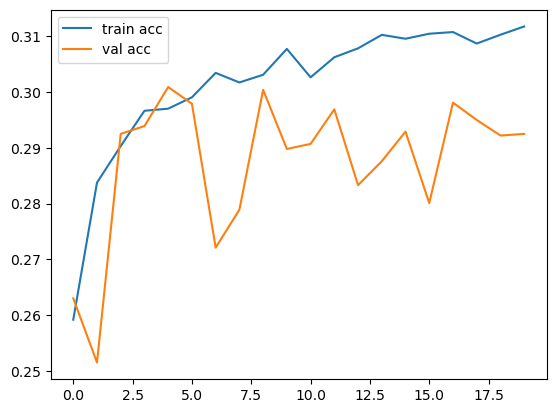

In [92]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(train_loss_history, label='train loss')
plt.plot(val_loss_history, label='val loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(train_acc_history, label='train acc')
plt.plot(val_acc_history, label='val acc')
plt.legend()
plt.show()

In [93]:
from PIL import Image
from torch import nn, save, load

In [94]:
with open('bharath1.pt', 'wb') as f: 
    save(model.state_dict(), f) 

In [95]:
with open('bharath1.pt', 'rb') as f: 
    model.load_state_dict(load(f))

In [98]:
from torchvision.transforms import ToTensor
# img = Image.open('horse.jpeg') 
# plt.imshow(img)
img,label = dataset[100]
img = np.array(img)
# img = img.resize((1, 32, 32, 3))
img_tensor = ToTensor()(img).unsqueeze(0)
print(torch.argmax(model(img_tensor)))

tensor(5)


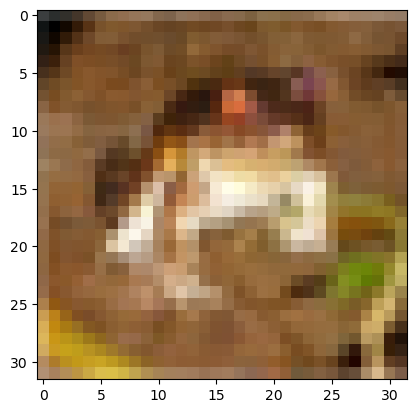

In [70]:
img, label = dataset[0]
plt.imshow(img.permute((1, 2, 0)))

In [53]:
# # img_tensor = ToTensor()(img).unsqueeze(0)

# # print(torch.argmax(model(img_tensor)))
# predicted_label = labels[model.predict(img).argmax()]